In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# best fit

In [2]:
car=pd.read_csv('car_age_price.csv')

In [3]:
car.head()

,Year,Price
0,2018,465000
1,2019,755000
2,2019,700000
3,2018,465000
4,2018,465000


In [4]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112 entries, 0 to 111
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Year    112 non-null    int64
 1   Price   112 non-null    int64
dtypes: int64(2)
memory usage: 1.9 KB


In [5]:
car.describe()

,Year,Price
count,112.000000,112.000000
mean,2016.669643,483866.044643
std,1.629616,91217.450533
min,2013.000000,300000.000000
25%,2015.000000,423750.000000
50%,2017.000000,500000.000000
75%,2017.000000,550000.000000
max,2020.000000,755000.000000


In [7]:
car["Year"].value_counts()

2017    47
2015    22
2019    12
2018    11
2016     6
2014     6
2020     4
2013     4
Name: Year, dtype: int64

In [8]:
car[car.duplicated()]

,Year,Price
3,2018,465000
4,2018,465000
9,2017,575000
15,2017,500000
16,2017,500000
18,2019,500000
19,2017,500000
20,2018,500000
21,2019,500000
23,2017,550000


In [9]:
car.drop_duplicates(inplace=True)

In [11]:
car.shape

(58, 2)

In [12]:
car["Year"].value_counts()

2017    15
2015    12
2019     7
2018     6
2016     6
2014     5
2020     4
2013     3
Name: Year, dtype: int64

In [13]:
car.isna().sum()

Year     0
Price    0
dtype: int64

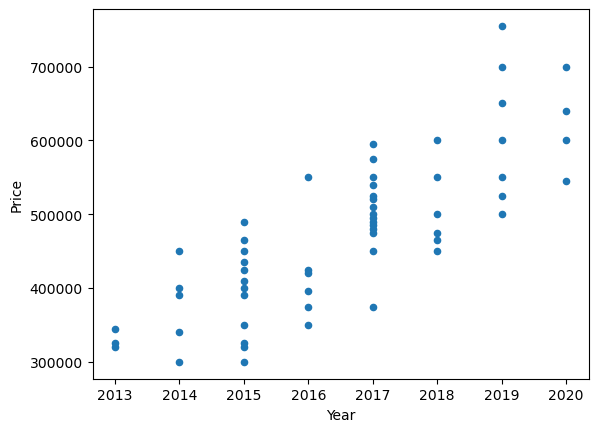

In [14]:
car.plot(kind='scatter',x='Year',y='Price')
plt.show()

In [15]:
x_train,x_test,y_train,y_test=train_test_split(car.Year,car.Price)

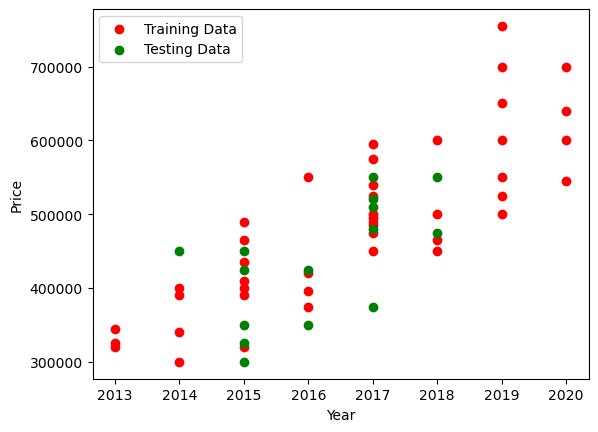

In [16]:
plt.scatter(x_train,y_train,label='Training Data',color='r')
plt.scatter(x_test,y_test,label='Testing Data',color='g')
plt.legend()
plt.xlabel('Year')
plt.ylabel('Price')
plt.show()

In [17]:
LR=LinearRegression()
LR.fit(x_train.values.reshape(-1,1),y_train.values)

LinearRegression()

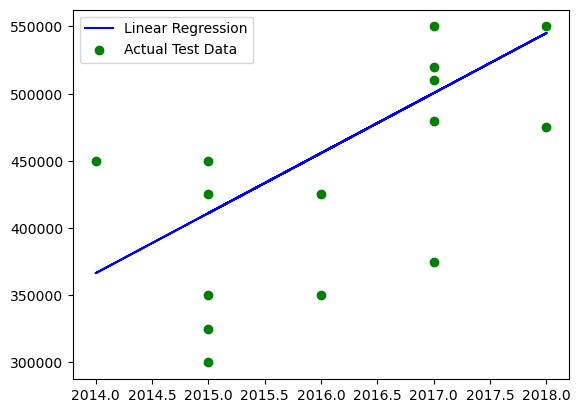

In [18]:
prediction=LR.predict(x_test.values.reshape(-1,1))
plt.plot(x_test,prediction,label='Linear Regression',color='b')
plt.scatter(x_test,y_test,label='Actual Test Data',color='g')
plt.legend()
plt.show()

# PRICE PREDICTION IN 2022

In [19]:
from sklearn.linear_model import LinearRegression

In [20]:
reg=LinearRegression()

In [21]:
reg.fit(car[['Year']],car['Price'])

LinearRegression()

In [22]:
reg.predict([[2022]])[0]

C:\Users\AARATHI R NAIR\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


718769.0188111365

# Linear regression and Lasso regression

In [23]:
x=car.drop(columns='Price',axis=1)
y=car['Price']

In [24]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=4)

In [25]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [26]:
 from sklearn.metrics import mean_squared_error,r2_score

In [27]:
x_pred_train=lr.predict(x_train)
r2_score(y_train,x_pred_train)

0.6075538547113875

In [28]:
x_pred_test=lr.predict(x_test)
r2_score(y_test,x_pred_test)

0.765494398035609

# lasso model


In [29]:
from sklearn.linear_model import Lasso
lasso=Lasso()
lasso.fit(x_train,y_train)

Lasso()

In [30]:
x_pred_lasso_test=lasso.predict(x_test)
r2_score(y_test,x_pred_lasso_test)

0.7654940142685532

Lasso Regression is a type of Linear Regression that add a penalty term in cost function, to shrink the coefficient of less important feature to zero.Lasso regression help to fit a model more accurate than linear regression.

##here is no change in score after implementing lasso test